[View in Colaboratory](https://colab.research.google.com/github/sanjames/DataProjects/blob/master/Lending_Club.ipynb)

# Lending Club

LendingClub is a US peer-to-peer lending company that enables borrowers to obtain a loan, and investors to purchase notes backed by payments made on loans. The purpose of this assignment is to use Gradient Boosting to analyze LendingClub data to see what we can learn from it.

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
file_list = drive.ListFile({'q': "'1X5iho5q-AgoGb8xXh7NeGN-I9i7m79G-' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: Lending Club.ipynb, id: 1Q9_tKpqQFjvY15zaqff4lFcREM4U5X90
title: create file in google drive.ipynb, id: 1fpfLLdBg-Nyy5em5SF2qIT-2YH21ryCE
title: LoanStats_2017Q4.csv, id: 157NITMa3H2jhfPXP7uyaCoHhqbJJg_4A


In [0]:
loan_downloaded = drive.CreateFile({'id': '157NITMa3H2jhfPXP7uyaCoHhqbJJg_4A'})
loan_downloaded.GetContentFile('LoanStats_2017Q4.csv')

# 1) Data Preparation, Analysis & Cleaning

In [0]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import seaborn as sns

In [0]:
loan_df = pd.read_csv('LoanStats_2017Q4.csv', low_memory=False)

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
bkp_loandf = loan_df.copy()

In [13]:
display(loan_df.head())

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,35000,35000,35000.0,36 months,10.42%,1136.27,B,B3,Room att,10+ years,RENT,55000.0,Verified,Dec-17,Current,n,NaN,NaN,other,Other,900xx,CA,23.69,0,Feb-97,0,NaN,92.0,12,1,3182,10.60%,29,w,30765.33,30765.33,5630.70,5630.70,4234.67,1396.03,0.0,0.0,0.0,Jun-18,1136.27,Jul-18,Jun-18,0,NaN,1,Individual,NaN,NaN,NaN,0,65,19616,0,2,0,2,17.0,16309,55.0,0,2,3036,33.0,30100,0,1,2,5,1635.0,15707.0,16.5,0,0,250.0,117,17,14,0,17.0,NaN,5.0,NaN,0,2,3,6,10,9,9,19,3,12,0.0,0,0,0,100.0,0.0,1,0,60015,19616,18800,29790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2700,2700,2700.0,36 months,9.93%,87.04,B,B2,Geologist,3 years,OWN,55000.0,Not Verified,Dec-17,Current,n,NaN,NaN,credit_card,Credit card refinancing,159xx,PA,37.12,0,Dec-07,2,NaN,NaN,15,0,10267,36.70%,22,w,2371.11,2371.11,431.48,431.48,328.89,102.59,0.0,0.0,0.0,Jun-18,87.04,Jul-18,Jun-18,0,NaN,1,Individual,NaN,NaN,NaN,0,0,194898,2,7,3,4,6.0,74486,72.0,1,2,5941,64.0,28000,0,0,7,6,12993.0,13826.0,38.3,0,0,98.0,120,4,4,2,4.0,NaN,3.0,NaN,0,3,5,5,6,11,7,9,5,15,0.0,0,0,4,100.0,0.0,0,0,253198,84753,22400,104151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,13000,13000,13000.0,36 months,7.97%,407.20,A,A5,rn,9 years,OWN,70000.0,Not Verified,Dec-17,Current,n,NaN,NaN,credit_card,Credit card refinancing,640xx,MO,13.29,0,Dec-02,0,NaN,NaN,7,0,11122,32.70%,25,w,11374.26,11374.26,2021.61,2021.61,1625.74,395.87,0.0,0.0,0.0,Jun-18,407.20,Jul-18,Jun-18,0,NaN,1,Individual,NaN,NaN,NaN,0,0,21629,0,2,0,2,14.0,10507,28.0,0,0,11122,30.0,34000,1,1,1,2,3090.0,

## 1.1) Understanding the data

### Loan data has the following info

    - 145 columns
    - 57 float datatype columns
    - 51 integer datatype columns 
    - 37 object datatypes

In [14]:
loan_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118648 entries, 0 to 118647
Data columns (total 145 columns):
id                                            0 non-null float64
member_id                                     0 non-null float64
loan_amnt                                     118648 non-null int64
funded_amnt                                   118648 non-null int64
funded_amnt_inv                               118648 non-null float64
term                                          118648 non-null object
int_rate                                      118648 non-null object
installment                                   118648 non-null float64
grade                                         118648 non-null object
sub_grade                                     118648 non-null object
emp_title                                     108779 non-null object
emp_length                                    108926 non-null object
home_ownership                                118648 non-null object

### The list of columns that has null values are below. We need to identify which columns to drop, what values to be filled for null values etc.

In [15]:
loan_df.isnull().sum()[loan_df.isnull().sum()>0]

id                                            118648
member_id                                     118648
emp_title                                       9869
emp_length                                      9722
url                                           118648
desc                                          118648
dti                                              222
mths_since_last_delinq                         64803
mths_since_last_record                        100719
revol_util                                       191
last_pymnt_d                                     174
next_pymnt_d                                   11434
last_credit_pull_d                                 5
mths_since_last_major_derog                    89534
annual_inc_joint                              101437
dti_joint                                     101437
verification_status_joint                     101443
mths_since_rcnt_il                              4341
il_util                                       

## 1.2) Data Cleaning

- Drop off unwanted features/columns
- convert object dtypes to numeric
- convert object dtypes with dates to date
- work on NULL values data

### 1.2.1) Drop off unwanted columns

#### Drop off id and member_id
id - A unique LC assigned ID for the loan listing.  
member_id - A unique LC assigned Id for the borrower member.  
We dont need this information for our analysis and hence I'm going to drop these columns  

In [0]:
loan_df.drop(['id','member_id'], axis=1, inplace=True)

#### Drop all columns where null values exceed 100000

In [17]:
loan_df.isnull().columns[(loan_df.isnull().sum()>0) & (loan_df.isnull().sum()>100000)].tolist()

['url',
 'desc',
 'mths_since_last_record',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'revol_bal_joint',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term']

In [0]:
loan_df.drop(['url', 'desc', 'mths_since_last_record',  'annual_inc_joint',  'dti_joint',  'verification_status_joint',  'revol_bal_joint',
 'sec_app_earliest_cr_line',  'sec_app_inq_last_6mths',  'sec_app_mort_acc',  'sec_app_open_acc',  'sec_app_revol_util',
 'sec_app_open_act_il',  'sec_app_num_rev_accts',  'sec_app_chargeoff_within_12_mths',  'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',  'hardship_type',  'hardship_reason',  'hardship_status',  'deferral_term',
 'hardship_amount',  'hardship_start_date',  'hardship_end_date',  'payment_plan_start_date',  'hardship_length',  'hardship_dpd',  'hardship_loan_status',
 'orig_projected_additional_accrued_interest',  'hardship_payoff_balance_amount',  'hardship_last_payment_amount',
 'debt_settlement_flag_date', 'settlement_status',  'settlement_date', 'settlement_amount',  'settlement_percentage',  
 'settlement_term'], axis=1, inplace=True)

### 1.2.2) Convert dtype objects to numeric

In [19]:
loan_df.dtypes[loan_df.dtypes=='O']

term                    object
int_rate                object
grade                   object
sub_grade               object
emp_title               object
emp_length              object
home_ownership          object
verification_status     object
issue_d                 object
loan_status             object
pymnt_plan              object
purpose                 object
title                   object
zip_code                object
addr_state              object
earliest_cr_line        object
revol_util              object
initial_list_status     object
last_pymnt_d            object
next_pymnt_d            object
last_credit_pull_d      object
application_type        object
hardship_flag           object
disbursement_method     object
debt_settlement_flag    object
dtype: object

In [20]:
loan_df[['int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status',
'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util',
'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'hardship_flag',
'disbursement_method', 'debt_settlement_flag']].head(2)

,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,10.42%,B,B3,Room att,10+ years,RENT,Verified,Dec-17,Current,n,other,Other,900xx,CA,Feb-97,10.60%,w,Jun-18,Jul-18,Jun-18,Individual,N,Cash,N
1,9.93%,B,B2,Geologist,3 years,OWN,Not Verified,Dec-17,Current,n,credit_card,Credit card refinancing,159xx,PA,Dec-07,36.70%,w,Jun-18,Jul-18,Jun-18,Individual,N,Cash,N


#### We have the following types
int_rate, revol_util has %  
issue_d, earliest_cr_line, last_pymnt_d, next_pymnt_d, last_credit_pull_d	has dates  
Everything else seems to be having categorical string values  

#### 1.2.2.1) Convert dtype object with % to float
The following features has % in it.
    - int_rate
    - revol_util

In [0]:
loan_df.loc[loan_df['revol_util'].notnull(), 'revol_util'] = loan_df['revol_util'][loan_df['revol_util'].notnull()].str[:-1].astype(float)/100

In [0]:
loan_df.loc[loan_df['int_rate'].notnull(), 'int_rate'] = loan_df['int_rate'][loan_df['int_rate'].notnull()].str[:-1].astype(float)/100

In [0]:
loan_df['revol_util'] = loan_df['revol_util'].astype(float)

#### 1.2.2.2) Convert date columns
    - issue_d - The month which the loan was funded
    - earliest_cr_line - The month the borrower's earliest reported credit line was opened
    - last_pymnt_d - Last month payment was received
    - next_pymnt_d - Next scheduled payment date
    - last_credit_pull_d - The most recent month LC pulled credit for this loan
All dates has mmm-yy format

#### issue_d 

In [24]:
loan_df['issue_d'].head(2)

0    Dec-17
1    Dec-17
Name: issue_d, dtype: object

In [0]:
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format = '%b-%y')

#### earliest_cr_line 

In [0]:
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'], format = '%b-%y')

#### last_pymt_d

In [0]:
loan_df['last_pymnt_d'] = pd.to_datetime(loan_df['last_pymnt_d'], format = '%b-%y')

#### next_pymnt_d 

In [0]:
loan_df['next_pymnt_d'] = pd.to_datetime(loan_df['next_pymnt_d'], format = '%b-%y')

#### last_credit_pull_d 

In [0]:
loan_df['last_credit_pull_d'] = pd.to_datetime(loan_df['last_credit_pull_d'], format = '%b-%y')

In [30]:
loan_df[['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']].head(5)

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,2017-12-01,1997-02-01,2018-06-01,2018-07-01,2018-06-01
1,2017-12-01,2007-12-01,2018-06-01,2018-07-01,2018-06-01
2,2017-12-01,2002-12-01,2018-06-01,2018-07-01,2018-06-01
3,2017-12-01,1993-04-01,2018-06-01,2018-07-01,2018-06-01
4,2017-12-01,1999-12-01,2018-06-01,2018-07-01,2018-06-01


In [0]:
loan_df['issue_d_float'] = loan_df.issue_d.values.astype(float)
loan_df['earliest_cr_line'] = loan_df.earliest_cr_line.values.astype(float)
loan_df['last_pymnt_d'] = loan_df.last_pymnt_d.values.astype(float)
loan_df['next_pymnt_d'] = loan_df.next_pymnt_d.values.astype(float)
loan_df['last_credit_pull_d'] = loan_df.last_credit_pull_d.values.astype(float)

#### 1.2.2.3) Term
The number of payments on the loan. Values are in months and can be either 36 or 60.

In [32]:
loan_df.term.value_counts()

 36 months    82677
 60 months    35971
Name: term, dtype: int64

In [0]:
loan_df['term'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
loan_df['term'] = loan_df['term'].astype(int)

#### 1.2.2.4) Grade and sub-grade
grade -	LC assigned loan grade  
sub_grade - LC assigned loan subgrade  

As per lending clubs website, the loan grade is the result of a formula that takes into account not only credit score, but also a combination of several indicators of credit risk from the credit report and loan application. All loans have either a 36- or 60-month term, with fixed interest rates and equal payments.

Since this is something that is derived for the loan, I'm going to drop these 2 columns

In [34]:
loan_df.grade.value_counts()

B    36832
C    32419
A    25126
D    17866
E     4720
F     1214
G      471
Name: grade, dtype: int64

In [35]:
loan_df.sub_grade.value_counts().head(3)

B5    7946
B1    7904
B3    7822
Name: sub_grade, dtype: int64

In [0]:
loan_df.drop(['grade', 'sub_grade'], axis=1, inplace=True)

#### 1.2.2.5) emp_title & emp_length
emp_title - The job title supplied by the Borrower when applying for the loan.  
emp_length - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.   

For this analysis purpose, I'm planning to drop the column emp_title as there are 9869 job titles and it is difficult to fill in with irrelevant values. Also lets comvert emp_length from object to integer

In [37]:
loan_df.emp_title.value_counts().head()

Teacher             2138
Manager             2048
Owner               1987
Driver              1039
Registered Nurse     857
Name: emp_title, dtype: int64

In [38]:
loan_df.emp_title.isnull().sum(), loan_df.emp_length.isnull().sum()

(9869, 9722)

In [0]:
loan_df.drop(['emp_title'], axis=1, inplace=True)

In [40]:
loan_df.emp_length.value_counts()

10+ years    38085
< 1 year     13029
2 years      10563
3 years       9253
1 year        7556
4 years       7240
5 years       6996
6 years       5083
7 years       4339
9 years       3559
8 years       3223
Name: emp_length, dtype: int64

In [0]:
#Convert Employee length categorical values to numeric
def emplduration(empl):
    if empl == '10+ years':
        return 10
    elif empl == '1 year':
        return 1
    elif empl == '2 years':
        return 2
    elif empl == '3 years':
        return 3
    elif empl == '4 years':
        return 4
    elif empl == '5 years':
        return 5
    elif empl == '6 years':
        return 6
    elif empl == '7 years':
        return 7
    elif empl == '8 years':
        return 8 
    elif empl == '9 years':
        return 9    
    elif empl ==  '< 1 year':
        return 0

In [42]:
loan_df['emp_length'] = loan_df['emp_length'].apply(emplduration)
loan_df.emp_length.value_counts()

10.0    38085
0.0     13029
2.0     10563
3.0      9253
1.0      7556
4.0      7240
5.0      6996
6.0      5083
7.0      4339
9.0      3559
8.0      3223
Name: emp_length, dtype: int64

In [43]:
loan_df.loc[loan_df.emp_length.isnull(), 'emp_length'] = 0
loan_df.emp_length = loan_df.emp_length.astype(int)
loan_df.emp_length.isnull().sum()

0

#### 1.2.2.6) Other Categorical Variables

####  home_ownership
home_ownership - The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER  

In [44]:
loan_df.home_ownership.value_counts()

MORTGAGE    57060
RENT        46287
OWN         15300
ANY             1
Name: home_ownership, dtype: int64

In [0]:
loan_df = pd.concat([loan_df, pd.get_dummies(loan_df['home_ownership'], prefix='HO')], axis=1)

In [0]:
loan_df.drop(['home_ownership'], axis=1, inplace=True)

#### verification_status
verification_status - Indicates if income was verified by LC, not verified, or if the income source was verified  

In [47]:
loan_df.verification_status.value_counts()

Not Verified       46078
Source Verified    44424
Verified           28146
Name: verification_status, dtype: int64

In [0]:
loan_df = pd.concat([loan_df, pd.get_dummies(loan_df['verification_status'], prefix='VS')], axis=1)
loan_df[['verification_status', 'VS_Not Verified', 'VS_Source Verified', 'VS_Verified']].head(3)
loan_df.drop(['verification_status'], axis=1, inplace=True)

####  loan_status
loan_status - Current status of the loan  

In [49]:
loan_df.loan_status.value_counts(), loan_df.loan_status.isnull().sum()

(Current               103892
 Fully Paid             10320
 Late (31-120 days)      1735
 In Grace Period         1152
 Charged Off             1114
 Late (16-30 days)        435
 Name: loan_status, dtype: int64, 0)

In [50]:
loan_df = pd.concat([loan_df, pd.get_dummies(loan_df['loan_status'], prefix='LS')], axis=1)
print(loan_df[['loan_status', 'LS_Current', 'LS_Fully Paid', 'LS_Late (31-120 days)', 'LS_In Grace Period',
        'LS_Charged Off', 'LS_Late (16-30 days)']].tail(3))
loan_df.drop(['loan_status'], axis=1, inplace=True)

       loan_status  LS_Current  LS_Fully Paid  LS_Late (31-120 days)  LS_In Grace Period  LS_Charged Off  LS_Late (16-30 days)
118645     Current           1              0                      0                   0               0                     0
118646     Current           1              0                      0                   0               0                     0
118647     Current           1              0                      0                   0               0                     0


####  pymnt_plan
pymnt_plan - Indicates if a payment plan has been put in place for the loan  

In [51]:
loan_df.pymnt_plan.value_counts()

n    118647
y         1
Name: pymnt_plan, dtype: int64

In [0]:
loan_df = pd.concat([loan_df, pd.get_dummies(loan_df['pymnt_plan'], prefix='pypl')], axis=1)
loan_df.drop(['pymnt_plan'], axis=1, inplace=True)

#### purpose & title
purpose - A category provided by the borrower for the loan request.   
title -	The loan title provided by the borrower  

In [53]:
loan_df.purpose.value_counts(), loan_df.purpose.isnull().sum()

(debt_consolidation    62452
 credit_card           25307
 other                 10846
 home_improvement       8678
 major_purchase         3227
 medical                1965
 small_business         1493
 house                  1438
 car                    1393
 moving                  900
 vacation                872
 renewable_energy         76
 educational               1
 Name: purpose, dtype: int64, 0)

In [0]:
loan_df = pd.concat([loan_df, pd.get_dummies(loan_df['purpose'], prefix='purpose')], axis=1)
loan_df.drop(['purpose'], axis=1, inplace=True)

In [55]:
loan_df.title.value_counts()

Debt consolidation         62451
Credit card refinancing    25308
Other                      10846
Home improvement            8678
Major purchase              3228
Medical expenses            1964
Business                    1493
Home buying                 1438
Car financing               1393
Moving and relocation        900
Vacation                     872
Green loan                    76
Learning and training          1
Name: title, dtype: int64

##### Dropping this column as title & purpose indicates the same

In [0]:
loan_df.drop(['title'], axis=1, inplace=True)

#### zip_code and addr_state
zip_code - The first 3 numbers of the zip code provided by the borrower in the loan application.  
addr_state - The state provided by the borrower in the loan application  

In [0]:
loan_df.drop(['zip_code', 'addr_state'], axis=1, inplace=True)

#### initial_list_status
initial_list_status - The initial listing status of the loan. Possible values are – W, F  

In [58]:
loan_df.initial_list_status.value_counts(), loan_df.initial_list_status.isnull().sum()

(w    96864
 f    21784
 Name: initial_list_status, dtype: int64, 0)

In [0]:
loan_df = pd.concat([loan_df, pd.get_dummies(loan_df['initial_list_status'], prefix='init_status')], axis=1)
loan_df.drop(['initial_list_status'], axis=1, inplace=True)

#### application_type 
Indicates whether the loan is an individual application or a joint application with two co-borrowers  

In [60]:
loan_df.application_type.value_counts(), loan_df.application_type.isnull().sum()

(Individual    101437
 Joint App      17211
 Name: application_type, dtype: int64, 0)

In [0]:
loan_df = pd.concat([loan_df, pd.get_dummies(loan_df['application_type'], prefix='app_type')], axis=1)
loan_df.drop(['application_type'], axis=1, inplace=True)

#### hardship_flag
Flags whether or not the borrower is on a hardship plan  

In [62]:
loan_df.hardship_flag.value_counts(), loan_df.hardship_flag.isnull().sum()

(N    118647
 Y         1
 Name: hardship_flag, dtype: int64, 0)

In [0]:
loan_df = pd.concat([loan_df, pd.get_dummies(loan_df['hardship_flag'], prefix='hship')], axis=1)
loan_df.drop(['hardship_flag'], axis=1, inplace=True)

####  disbursement_method
The method by which the borrower receives their loan. Possible values are: CASH, DIRECT_PAY  

In [64]:
loan_df.disbursement_method.value_counts(), loan_df.disbursement_method.isnull().sum()

(Cash         115065
 DirectPay      3583
 Name: disbursement_method, dtype: int64, 0)

In [0]:
loan_df = pd.concat([loan_df, pd.get_dummies(loan_df['disbursement_method'], prefix='disb')], axis=1)
loan_df.drop(['disbursement_method'], axis=1, inplace=True)

#### debt_settlement_flag 
Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company.  

In [66]:
loan_df.debt_settlement_flag.value_counts(), loan_df.debt_settlement_flag.isnull().sum()

(N    118620
 Y        28
 Name: debt_settlement_flag, dtype: int64, 0)

In [0]:
loan_df = pd.concat([loan_df, pd.get_dummies(loan_df['debt_settlement_flag'], prefix='debtset')], axis=1)
loan_df.drop(['debt_settlement_flag'], axis=1, inplace=True)

### 1.2.3) Work on NULL values data

In [68]:
loan_df.isnull().sum()[loan_df.isnull().sum()>0]

dti                                 222
mths_since_last_delinq            64803
revol_util                          191
mths_since_last_major_derog       89534
mths_since_rcnt_il                 4341
il_util                           18608
all_util                             37
avg_cur_bal                          11
bc_open_to_buy                     1880
bc_util                            1934
mo_sin_old_il_acct                 4341
mths_since_recent_bc               1769
mths_since_recent_bc_dlq          94167
mths_since_recent_inq             14800
mths_since_recent_revol_delinq    83298
num_tl_120dpd_2m                   6835
percent_bc_gt_75                   1888
dtype: int64

#### 1.2.3.1) dti
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

222


Text(0,0.5,'Count')

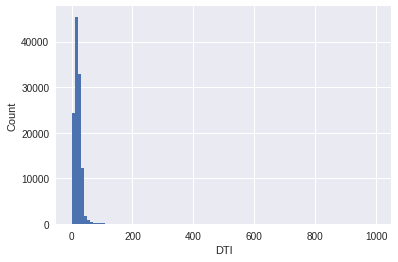

In [69]:
print(loan_df.dti.isnull().sum())
ax1 = loan_df.dti.dropna().hist(bins=100)
ax1.set_xlabel('DTI')
ax1.set_ylabel('Count')

In [0]:
avg_dti = loan_df.dti.mean()
std_dti = loan_df.dti.std()
countnan_dti = loan_df.dti.isnull().sum()
random_dti = np.random.randint(std_dti-avg_dti, std_dti+avg_dti, size = countnan_dti)

In [0]:
loan_df.loc[np.isnan(loan_df['dti']),'dti'] = random_dti

#### 1.2.3.2) mths_since_last_delinq
The number of months since the borrower's last delinquency.  

In [72]:
loan_df.mths_since_last_delinq.isnull().sum()

64803

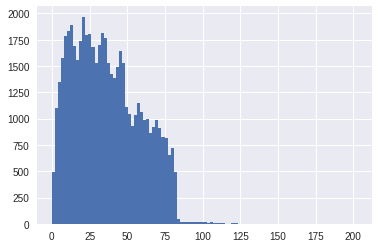

In [73]:
loan_df.mths_since_last_delinq.dropna().hist(bins=100)

In [74]:
avg_mths_since_last_delinq = loan_df.mths_since_last_delinq.mean()
std_mths_since_last_delinq = loan_df.mths_since_last_delinq.std()
countnan_mths_since_last_delinq = loan_df.mths_since_last_delinq.isnull().sum()
random_mths_since_last_delinq = np.random.randint(std_mths_since_last_delinq-avg_mths_since_last_delinq, 
                                                  std_mths_since_last_delinq+avg_mths_since_last_delinq, 
                                                  size = countnan_mths_since_last_delinq)
avg_mths_since_last_delinq, std_mths_since_last_delinq, countnan_mths_since_last_delinq, random_mths_since_last_delinq

(36.68056458352679,
 21.765067895595934,
 64803,
 array([42,  5, 53, ..., 51, 19, 51]))

In [0]:
loan_df.loc[np.isnan(loan_df['mths_since_last_delinq']),'mths_since_last_delinq'] = np.random.randint(
    loan_df.mths_since_last_delinq.std()-loan_df.mths_since_last_delinq.mean(), 
    loan_df.mths_since_last_delinq.std()+loan_df.mths_since_last_delinq.mean(), 
    size = loan_df.mths_since_last_delinq.isnull().sum())

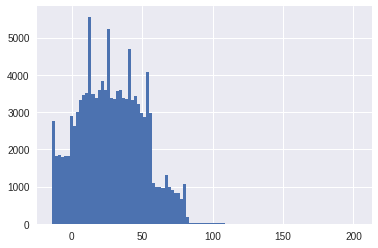

In [76]:
loan_df.mths_since_last_delinq.dropna().hist(bins=100)

#### 1.2.3.3) revol_util
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [77]:
loan_df.revol_util.isnull().sum()

191

Text(0,0.5,'Count')

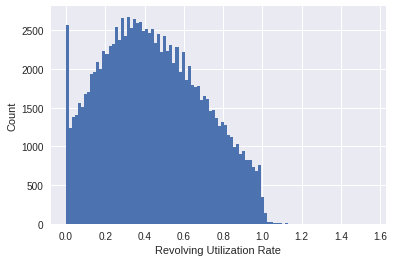

In [78]:
ax1 = loan_df.revol_util.dropna().hist(bins=100)
ax1.set_xlabel('Revolving Utilization Rate')
ax1.set_ylabel('Count')

In [79]:
avg_revol_util = loan_df.revol_util.mean()
std_revol_util = loan_df.revol_util.std()
countnan_revol_utili = loan_df.revol_util.isnull().sum()
avg_revol_util, std_revol_util, countnan_revol_utili

(0.44344130781633845, 0.2524285693378544, 191)

In [0]:
loan_df.loc[loan_df.revol_util.isnull(),'revol_util'] = avg_revol_util

#### 1.2.3.4) last_pymnt_d, next_pymnt_d
Last month payment was received.  
When the last_pymnt_amnt is 0, last_pymnt_d is NULL. This is as per design and hence data cleaning or removing is not required.

next_pymnt_d - Next scheduled payment date.  
When the loan_status is charged off or fully paid, the next scheduled payment date is null. This is as per design and hence data cleaning or removing is not required.

#### 1.2.3.5) last_credit_pull_d
The most recent month LC pulled credit for this loan

In [81]:
loan_df.last_credit_pull_d.isnull().sum()

0

#### 1.2.3.6) mths_since_rcnt_il
Months since most recent installment accounts opened

In [82]:
loan_df.mths_since_rcnt_il.isnull().sum()

4341

Text(0,0.5,'Count')

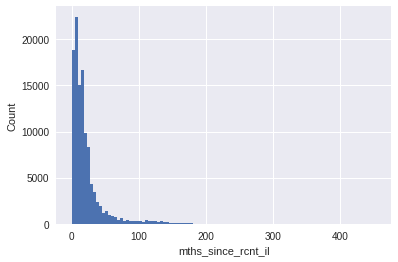

In [83]:
ax1 = loan_df.mths_since_rcnt_il.dropna().hist(bins=100)
ax1.set_xlabel('mths_since_rcnt_il')
ax1.set_ylabel('Count')

In [84]:
avg_m = loan_df.mths_since_rcnt_il.mean()
std_m = loan_df.mths_since_rcnt_il.std()
countnan_m = loan_df.mths_since_rcnt_il.isnull().sum()
avg_m, std_m, countnan_m

(21.19127437514763, 26.36255398466649, 4341)

In [0]:
random_m = np.random.randint(std_m-avg_m, std_m+avg_m, size = countnan_m)
loan_df.loc[loan_df.mths_since_rcnt_il.isnull(), 'mths_since_rcnt_il'] = random_m

#### 1.2.3.7) il_util
Ratio of total current balance to high credit/credit limit on all install acct

In [86]:
loan_df.il_util.isnull().sum()

18608

Text(0,0.5,'Count')

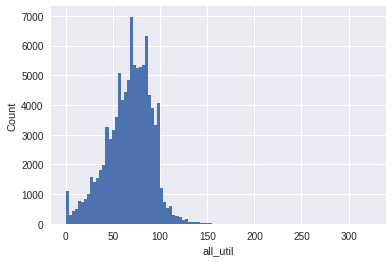

In [87]:
ax1 = loan_df.il_util.dropna().hist(bins=100)
ax1.set_xlabel('all_util')
ax1.set_ylabel('Count')

In [88]:
loan_df.il_util.mean(), loan_df.il_util.std(), loan_df.il_util.median(), loan_df.il_util.isnull().sum()

(67.62686925229907, 23.952642931504876, 70.0, 18608)

In [0]:
loan_df.loc[loan_df.il_util.isnull(), 'il_util'] = loan_df.il_util.mean()

#### 1.2.3.8) all_util
Balance to credit limit on all trades

In [90]:
loan_df.all_util.isnull().sum()

37

Text(0,0.5,'Count')

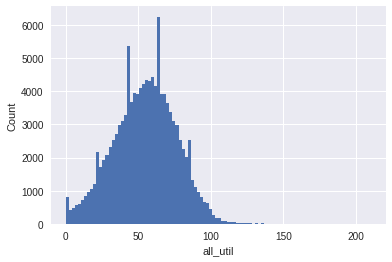

In [91]:
ax1 = loan_df.all_util.dropna().hist(bins=100)
ax1.set_xlabel('all_util')
ax1.set_ylabel('Count')

In [92]:
loan_df.all_util.mean(), loan_df.all_util.std(), loan_df.all_util.isnull().sum()

(54.37487248231614, 21.413863717498025, 37)

In [0]:
loan_df.loc[loan_df.all_util.isnull(), 'all_util'] = loan_df.all_util.mean()

#### 1.2.3.9) avg_cur_bal
Average current balance of all accounts

In [94]:
loan_df.avg_cur_bal.isnull().sum()

11

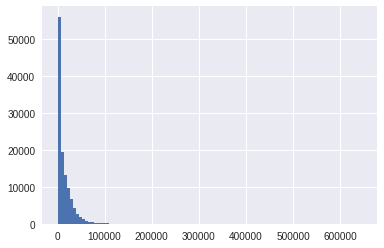

In [95]:
loan_df.avg_cur_bal.dropna().hist(bins=100)

In [0]:
loan_df.loc[loan_df.avg_cur_bal.isnull(), 'avg_cur_bal'] = loan_df.avg_cur_bal.median()

#### 1.2.3.10) bc_open_to_buy
Total open to buy on revolving bankcards.

In [97]:
loan_df.bc_open_to_buy.isnull().sum()

1880

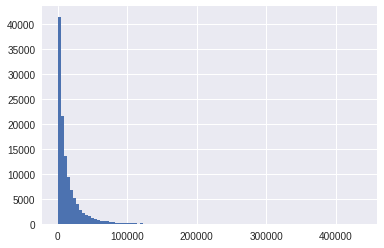

In [98]:
loan_df.bc_open_to_buy.dropna().hist(bins=100)

In [0]:
loan_df.loc[loan_df.bc_open_to_buy.isnull(), 'bc_open_to_buy'] = loan_df.bc_open_to_buy.median()

#### 1.2.3.11) bc_util
Ratio of total current balance to high credit/credit limit for all bankcard accounts.

In [100]:
loan_df.bc_util.isnull().sum()

1934

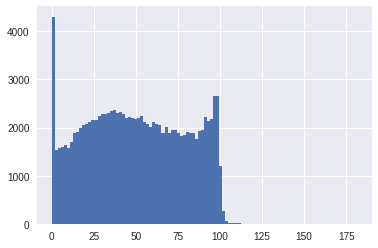

In [101]:
loan_df.bc_util.dropna().hist(bins=100)

In [102]:
loan_df.bc_util.mean(), loan_df.bc_util.median(), loan_df.bc_util.std(), loan_df.bc_util.isnull().sum()

(50.38467621707764, 49.4, 29.27889682895024, 1934)

In [0]:
random_bcutil = np.random.randint(loan_df.bc_util.mean()-loan_df.bc_util.std(), loan_df.bc_util.mean()+loan_df.bc_util.std(),
                                 size = loan_df.bc_util.isnull().sum())
loan_df.loc[loan_df.bc_util.isnull(),'bc_util'] = random_bcutil

#### 1.2.3.12) mo_sin_old_il_acct
Months since oldest bank installment account opened


In [104]:
loan_df.mo_sin_old_il_acct.isnull().sum()

4341

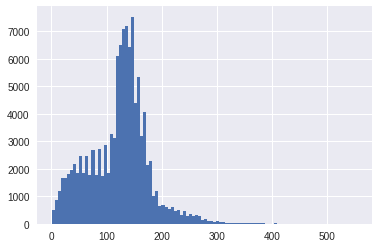

In [105]:
loan_df.mo_sin_old_il_acct.hist(bins=100)

In [106]:
loan_df.mo_sin_old_il_acct.mean(), loan_df.mo_sin_old_il_acct.median(), loan_df.mo_sin_old_il_acct.std(), loan_df.mo_sin_old_il_acct.isnull().sum()

(123.27686843325431, 130.0, 54.90428773556194, 4341)

In [0]:
random_mo_oldil = np.random.randint(loan_df.mo_sin_old_il_acct.mean()-loan_df.mo_sin_old_il_acct.std(),
                                   loan_df.mo_sin_old_il_acct.mean()+loan_df.mo_sin_old_il_acct.std(),
                                   size = loan_df.mo_sin_old_il_acct.isnull().sum())
loan_df.loc[loan_df.mo_sin_old_il_acct.isnull(), 'mo_sin_old_il_acct'] = random_mo_oldil

#### 1.2.3.13) mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq & mths_since_recent_revol_delinq 
mths_since_recent_bc - Months since most recent bankcard account opened.  
mths_since_recent_bc_dlq - Months since most recent bankcard delinquency.  
mths_since_recent_inq - Months since most recent inquiry.  
mths_since_recent_revol_delinq - Months since most recent revolving delinquency.  

In [108]:
loan_df.mths_since_recent_bc.isnull().sum(), loan_df.mths_since_recent_bc_dlq.isnull().sum()

(1769, 94167)

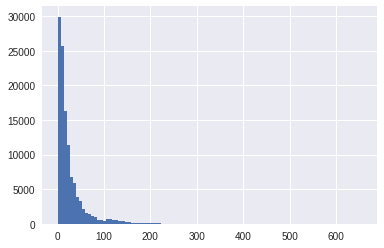

In [109]:
loan_df.mths_since_recent_bc.dropna().hist(bins=100)

In [0]:
loan_df.loc[loan_df.mths_since_recent_bc.isnull(), 'mths_since_recent_bc'] = loan_df.mths_since_recent_bc.median()

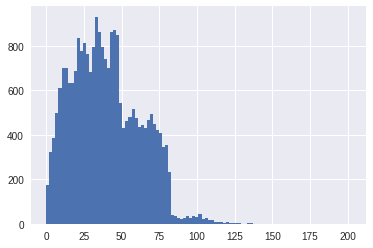

In [111]:
loan_df.mths_since_recent_bc_dlq.dropna().hist(bins=100)

In [0]:
loan_df.loc[loan_df.mths_since_recent_bc_dlq.isnull(), 'mths_since_recent_bc_dlq'] = np.random.randint(loan_df.mths_since_recent_bc_dlq.mean()-loan_df.mths_since_recent_bc_dlq.std(),
                                   loan_df.mths_since_recent_bc_dlq.mean()+loan_df.mths_since_recent_bc_dlq.std(),
                                   size = loan_df.mths_since_recent_bc_dlq.isnull().sum())

In [113]:
loan_df.mths_since_recent_inq.isnull().sum(), loan_df.mths_since_recent_revol_delinq.isnull().sum()

(14800, 83298)

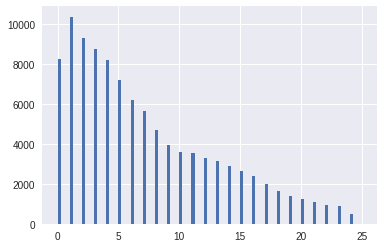

In [114]:
loan_df.mths_since_recent_inq.dropna().hist(bins=100)

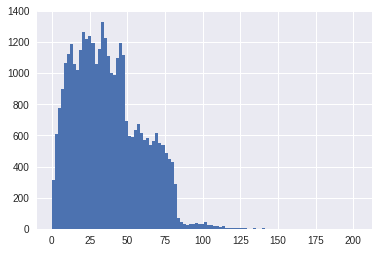

In [115]:
loan_df.mths_since_recent_revol_delinq.dropna().hist(bins=100)

In [0]:
loan_df.loc[loan_df.mths_since_recent_inq.isnull(), 'mths_since_recent_inq'] = loan_df.mths_since_recent_inq.median()
loan_df.loc[loan_df.mths_since_recent_revol_delinq.isnull(), 'mths_since_recent_revol_delinq'] = np.random.randint(loan_df.mths_since_recent_revol_delinq.mean()-loan_df.mths_since_recent_revol_delinq.std(),
                                   loan_df.mths_since_recent_revol_delinq.mean()+loan_df.mths_since_recent_revol_delinq.std(),
                                   size = loan_df.mths_since_recent_revol_delinq.isnull().sum())

#### 1.2.3.14) num_tl_120dpd_2m
Number of accounts currently 120 days past due (updated in past 2 months)

In [117]:
loan_df.num_tl_120dpd_2m.isnull().sum(), loan_df.num_tl_120dpd_2m.value_counts()

(6835, 0.0    111808
 1.0         4
 3.0         1
 Name: num_tl_120dpd_2m, dtype: int64)

In [0]:
loan_df.loc[loan_df.num_tl_120dpd_2m.isnull(),'num_tl_120dpd_2m'] = 0.0

#### 1.2.3.15) percent_bc_gt_75
Percentage of all bankcard accounts > 75% of limit.

In [119]:
loan_df.percent_bc_gt_75.isnull().sum()

1888

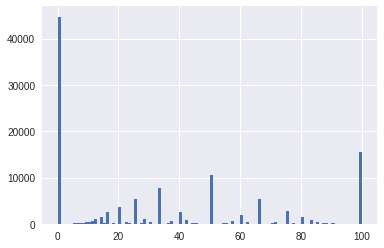

In [120]:
loan_df.percent_bc_gt_75.dropna().hist(bins=100)

In [0]:
loan_df.loc[loan_df.percent_bc_gt_75.isnull(), 'percent_bc_gt_75'] = loan_df.percent_bc_gt_75.mean()

#### 1.2.3.16) mths_since_last_major_derog
Months since most recent 90-day or worse rating

In [122]:
loan_df.mths_since_last_major_derog.isnull().sum()

89534

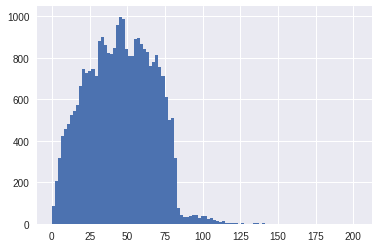

In [123]:
loan_df.mths_since_last_major_derog.dropna().hist(bins=100)

In [0]:
loan_df.loc[loan_df.mths_since_last_major_derog.isnull(), 'mths_since_last_major_derog'] = np.random.randint(loan_df.mths_since_last_major_derog.mean()-loan_df.mths_since_last_major_derog.std(),
                                   loan_df.mths_since_last_major_derog.mean()+loan_df.mths_since_last_major_derog.std(),
                                   size = loan_df.mths_since_last_major_derog.isnull().sum())

In [125]:
loan_df.isnull().sum()[loan_df.isnull().sum()>0]

Series([], dtype: int64)

# 2) Exploratory Data Analysis

No EDA done for this assignment

# 3) Find the correlation, identify important features and create new feature

## 3.1) Create a new feature debt-to-income ratio

In [0]:
loan_df['debt_to_income_ratio'] = loan_df['annual_inc']/12/loan_df['revol_bal']

In [0]:
loan_df.loc[loan_df['debt_to_income_ratio'].isnull(),'debt_to_income_ratio'] = 0.0
loan_df.loc[np.isinf(loan_df['debt_to_income_ratio']),'debt_to_income_ratio'] = 0.0

In [128]:
loan_df.debt_to_income_ratio[np.isinf(loan_df.debt_to_income_ratio)]

Series([], Name: debt_to_income_ratio, dtype: float64)

In [129]:
loan_df.debt_to_income_ratio[(loan_df.debt_to_income_ratio.isnull())]

Series([], Name: debt_to_income_ratio, dtype: float64)

## 3.2) Correlation Matrix 

In [0]:
corr=loan_df.corr()

In [131]:
corr['int_rate'][(corr['int_rate']>0.29) | (corr['int_rate'] <-0.29)]

term                0.346798
int_rate            1.000000
revol_util          0.326889
total_rec_int       0.523791
all_util            0.339794
bc_open_to_buy     -0.322647
bc_util             0.340080
percent_bc_gt_75    0.330752
Name: int_rate, dtype: float64

## 3.3) Gradient Boosting Model - Ensemble Methods

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [0]:
X, y = shuffle(loan_df.drop(['int_rate', 'issue_d', 'earliest_cr_line', 'last_pymnt_d',
                            'next_pymnt_d', 'last_credit_pull_d'], axis=1), loan_df['int_rate'], random_state=13)

In [0]:
feature_names = np.asarray(X.columns.tolist())

In [0]:
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [136]:
X_train.shape, X_test.shape

((106783, 124), (11865, 124))

### 3.3.1) Fitting GBM model on training set with 1000 trees

In [0]:
# Fit regression model
params_init = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gb_clf_init = ensemble.GradientBoostingRegressor(**params_init)

In [0]:
gb_model_init = gb_clf_init.fit(X_train, y_train)
gb_model_pred_init = gb_clf_init.predict(X_test)

In [139]:
mse_init = mean_squared_error(y_test, gb_model_pred_init)
print("MSE: %.4f" % mse_init)
print("Accuracy Score/ R squared for Train: %.2f" %gb_model_init.score(X_train, y_train))
print("Accuracy Score/ R squared for Test: %.2f" %gb_model_init.score(X_test, y_test))

MSE: 0.0002
Accuracy Score/ R squared for Train: 0.91
Accuracy Score/ R squared for Test: 0.91


Text(0,0.5,'Predictions')

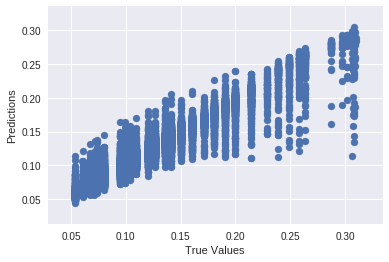

In [140]:
plt.scatter(y_test, gb_model_pred_init)
plt.xlabel("True Values")
plt.ylabel("Predictions")

Text(0,0.5,'Deviance')

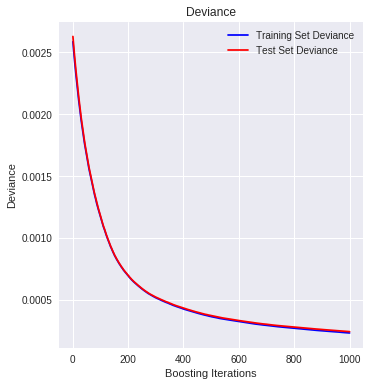

In [143]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params_init['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gb_clf_init.staged_predict(X_test)):
    test_score[i] = gb_clf_init.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params_init['n_estimators']) + 1, gb_clf_init.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params_init['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

### 3.3.2) Determining the important variables using GBM model

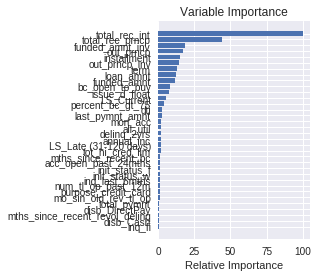

In [145]:
# #############################################################################
# Plot feature importance
feature_importance = gb_clf_init.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx[90:].shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx[90:]], align='center')
plt.yticks(pos,feature_names[sorted_idx[90:]])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [146]:
feature_names[sorted_idx[90:]]

array(['inq_fi', 'disb_Cash', 'mths_since_recent_revol_delinq',
       'disb_DirectPay', 'total_pymnt', 'mo_sin_old_rev_tl_op',
       'purpose_credit_card', 'num_tl_op_past_12m', 'inq_last_6mths',
       'init_status_w', 'init_status_f', 'acc_open_past_24mths',
       'mths_since_recent_bc', 'tot_hi_cred_lim', 'LS_Late (31-120 days)',
       'annual_inc', 'delinq_2yrs', 'all_util', 'mort_acc',
       'last_pymnt_amnt', 'dti', 'percent_bc_gt_75', 'LS_Current',
       'issue_d_float', 'bc_open_to_buy', 'funded_amnt', 'loan_amnt',
       'term', 'out_prncp_inv', 'installment', 'out_prncp',
       'funded_amnt_inv', 'total_rec_prncp', 'total_rec_int'],
      dtype='<U30')

### 3.3.3) Create a new dataframe having only the relevant columns

In [0]:
final_loan_df = loan_df[['inq_fi', 'mths_since_recent_revol_delinq', 'disb_Cash',
       'disb_DirectPay', 'total_pymnt', 'mo_sin_old_rev_tl_op',
       'purpose_credit_card', 'init_status_f', 'inq_last_6mths',
       'num_tl_op_past_12m', 'mths_since_recent_bc', 'tot_hi_cred_lim',
       'acc_open_past_24mths', 'init_status_w', 'annual_inc',
       'LS_Late (31-120 days)', 'delinq_2yrs', 'mort_acc',
       'last_pymnt_amnt', 'all_util', 'dti', 'percent_bc_gt_75',
       'LS_Current', 'bc_open_to_buy', 'issue_d_float', 'loan_amnt',
       'funded_amnt', 'term', 'out_prncp_inv', 'installment', 'out_prncp',
       'funded_amnt_inv', 'total_rec_prncp', 'total_rec_int','debt_to_income_ratio','int_rate']]

In [148]:
final_loan_df.shape

(118648, 36)

### 3.3.4) Do Gradient Boosting again with the new dataset.

In [0]:
from sklearn.model_selection import train_test_split

In [150]:
X, y = shuffle(final_loan_df.drop(['int_rate'], axis=1), final_loan_df['int_rate'], random_state=13)
X.shape, y.shape

((118648, 35), (118648,))

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(83053, 35) (83053,) (35595, 35) (35595,)


In [0]:
feature_names = np.asarray(X.columns.tolist())

In [0]:
# Fit regression model
params_new = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gb_clf_new = ensemble.GradientBoostingRegressor(**params_new)

In [0]:
gb_model_new = gb_clf_new.fit(X_train, y_train)
gb_model_pred_new = gb_clf_new.predict(X_test)

In [155]:
mse_new = mean_squared_error(y_test, gb_model_pred_new)
print("MSE: %.4f" % mse_new)
print("Accuracy Score/ R squared for Train: %.2f" %gb_model_new.score(X_train, y_train))
print("Accuracy Score/ R squared for Test: %.2f" %gb_model_new.score(X_test, y_test))

MSE: 0.0003
Accuracy Score/ R squared for Train: 0.91
Accuracy Score/ R squared for Test: 0.90


Text(0,0.5,'Predictions')

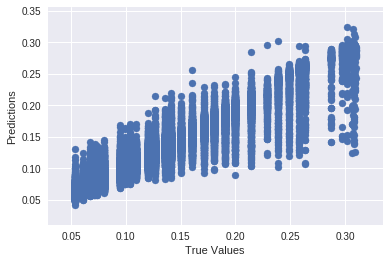

In [156]:
plt.scatter(y_test, gb_model_pred_new)
plt.xlabel("True Values")
plt.ylabel("Predictions")

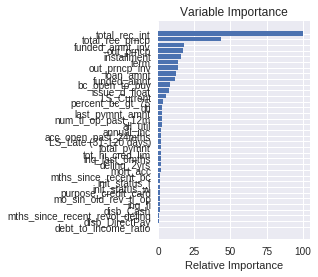

In [157]:
# #############################################################################
# Plot feature importance
feature_importance = gb_clf_new.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### 3.3.5) Cross-Validation to optimize the parameters

In [158]:
from sklearn.grid_search import GridSearchCV

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [0]:
param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6],
              'min_samples_leaf': [3, 5]
              }
gb_clf_cv = GridSearchCV(ensemble.GradientBoostingRegressor(n_estimators=1000),
                   param_grid, n_jobs=4, refit=True)

In [0]:
gb_clf_model_cv = gb_clf_cv.fit(X_train, y_train)

In [161]:
gb_clf_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 5}

In [162]:
gb_clf_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=5,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [163]:
gb_clf_cv.best_score_

0.9722033932251477

### 3.3.6) Using the best parameters from GridsearchCV - Estimators - 1000, Learning rate 0.1, max_depth = 6, min_samples_leaf =5

In [165]:
%%time
params_best = {'n_estimators': 1000, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 5,
          'learning_rate': 0.1, 'loss': 'ls'}
gb_clf_best = ensemble.GradientBoostingRegressor(**params_best)
gb_model_best = gb_clf_best.fit(X_train, y_train)
gb_model_pred_best = gb_clf_best.predict(X_test)

CPU times: user 8min 11s, sys: 98.4 ms, total: 8min 11s
Wall time: 8min 11s


In [166]:
mse_best = mean_squared_error(y_test, gb_model_pred_best)
print("MSE: %.4f" % mse_best)
print("Accuracy Score/ R squared for Train: %.2f" %gb_model_best.score(X_train, y_train))
print("Accuracy Score/ R squared for Test: %.2f" %gb_model_best.score(X_test, y_test))

MSE: 0.0001
Accuracy Score/ R squared for Train: 1.00
Accuracy Score/ R squared for Test: 0.98


The accuracy score for test data with the optimized parameters seem to increase. This might have caused some overfitting as well.

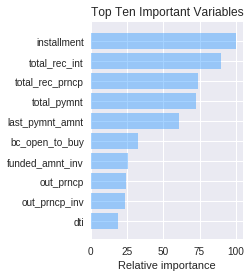

In [168]:
plt.subplot(1, 2, 2,)
# Top Ten
feature_importance_best = gb_clf_best.feature_importances_
feature_importance_best = 100.0 * (feature_importance_best / feature_importance_best.max())

indices = np.argsort(feature_importance_best)[-10:]
plt.barh(np.arange(10), feature_importance_best[indices],color='dodgerblue',alpha=.4)
plt.yticks(np.arange(10 + 0.25), np.array(final_loan_df.columns)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')

Thease are the top 10 variables that impacted the interest rate.

##### Partial Dependence Plots

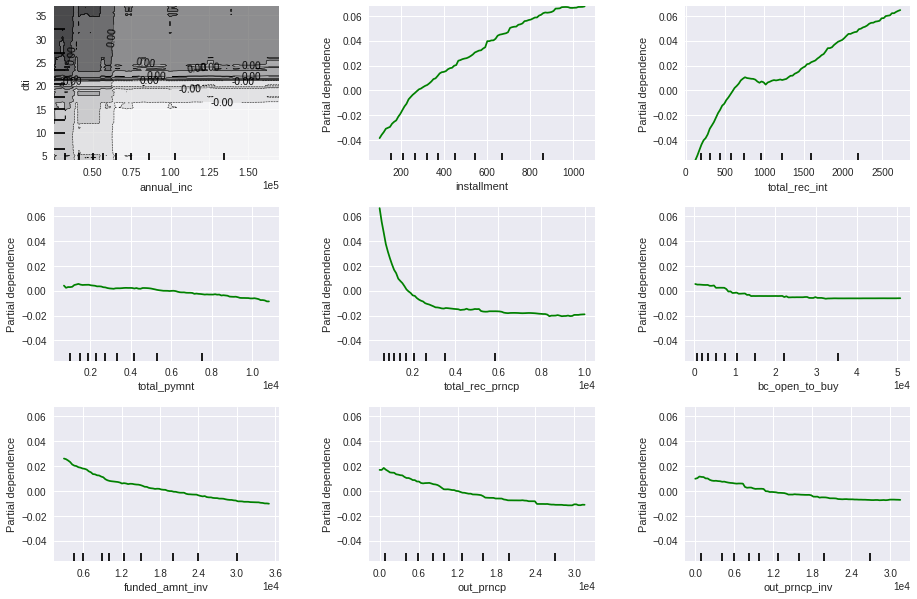

In [170]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

pfeatures = [('annual_inc', 'dti'), 'installment', 'total_rec_int', 'total_pymnt', 'total_rec_prncp', 'bc_open_to_buy', 'funded_amnt_inv', 'out_prncp', 'out_prncp_inv']

fig, axs = plot_partial_dependence(gb_clf_best, X_train, pfeatures,
                                   feature_names=list(final_loan_df.columns),
                                   figsize=(14, 14), n_jobs=4)

### 3.3.7) K-Folds Cross Validation
https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.  
<img src="kfold.png" width=500px align='left'>

In [171]:
from sklearn.model_selection import KFold # import KFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV, cross_val_score
kf = KFold(n_splits=2, random_state=None, shuffle=False) # Define the split - into 10 folds 
#kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
params_kfold = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
kfoldgb_clf = ensemble.GradientBoostingRegressor(**params_kfold)

KFold(n_splits=2, random_state=None, shuffle=False)


In [172]:
i=1
score_array=[]
for train_index, test_index in kf.split(X):
    print("K FOLD #",i)
    i = i+1
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    kfold_gbmodel = kfoldgb_clf.fit(X_train, y_train)
    kfold_pred = kfoldgb_clf.predict(X_test)
    mse = mean_squared_error(y_test, kfold_pred)
    print("MSE: %.4f" % mse)
    print("Accuracy Score:", kfold_gbmodel.score(X_test, y_test))
    cvscore = cross_val_score(kfold_gbmodel, X_train, y_train)
    print("Cross validation score:", cvscore)
    print(cvscore.mean())

K FOLD # 1
TRAIN: [ 59324  59325  59326 ... 118645 118646 118647] TEST: [    0     1     2 ... 59321 59322 59323]
MSE: 0.0025
Accuracy Score: -0.012176645559673682
Cross validation score: [-0.00832512 -0.00437527 -0.00739585]
-0.006698743571204775
K FOLD # 2
TRAIN: [    0     1     2 ... 59321 59322 59323] TEST: [ 59324  59325  59326 ... 118645 118646 118647]
MSE: 0.0028
Accuracy Score: -0.011121851661717974
Cross validation score: [-0.00346669 -0.00254357 -0.00505164]
-0.0036873005549037754


In [174]:
kfold_mse = mean_squared_error(y_test, kfoldgb_clf.predict(X_test))
print("MSE: %.4f" % kfold_mse)

MSE: 0.0028


Text(0,0.5,'Predictions')

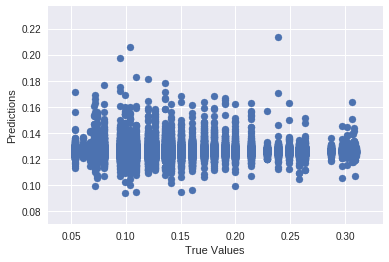

In [175]:
plt.scatter(y_test, kfold_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")